# Basic Utils Import

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring = None, 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

# Data loading and exploration

In [4]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [5]:
combine = [train_df, test_df]

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
print("-" * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [8]:
train_df["Survived"].mean()

0.38383838383838381

In [9]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
train_missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train_missing[train_missing.Percent > 0]

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


In [10]:
#missing data
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
test_missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
test_missing[test_missing.Percent > 0]

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


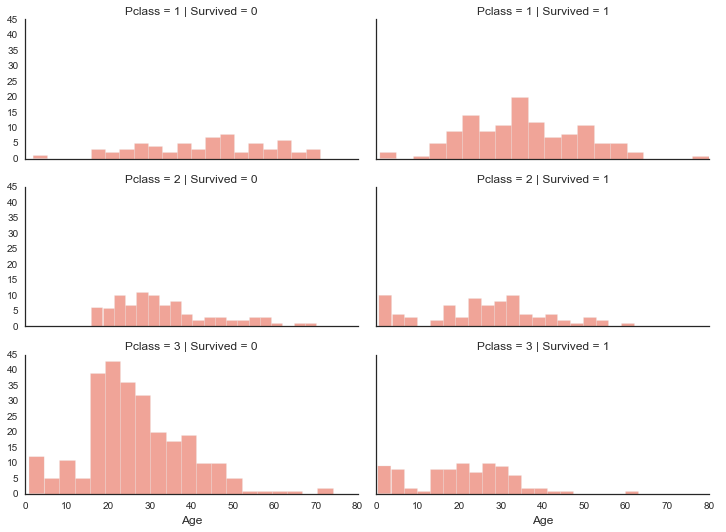

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=2.5, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


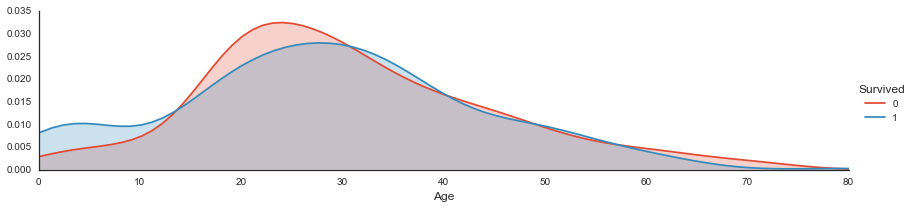

In [14]:
plot_distribution(train_df , var = 'Age', target = 'Survived' )

In [15]:
for dataset in combine:
    dataset["hasCabin"] = pd.Series(len(dataset["Cabin"]), index=dataset.index)
    dataset["hasCabin"] = 0 
    dataset.loc[dataset["Cabin"].notnull(), "hasCabin"] = 1
    #transform data
    dataset.loc[dataset["hasCabin"]==1, "Cabin"] = dataset[dataset.Cabin.notnull()].Cabin.str[0].astype(str)
    dataset.loc[dataset["hasCabin"]==0, "Cabin"] = "N"

In [16]:
train_df[["Cabin", "Survived"]].groupby(["Cabin"], as_index=False).agg( {"Survived": ["mean", "count"]})

Cabin  Survived      
             mean count
0     A  0.466667    15
1     B  0.744681    47
2     C  0.593220    59
3     D  0.757576    33
4     E  0.750000    32
5     F  0.615385    13
6     G  0.500000     4
7     N  0.299854   687
8     T  0.000000     1

In [17]:
train_df["Cabin"].describe()

count     891
unique      9
top         N
freq      687
Name: Cabin, dtype: object

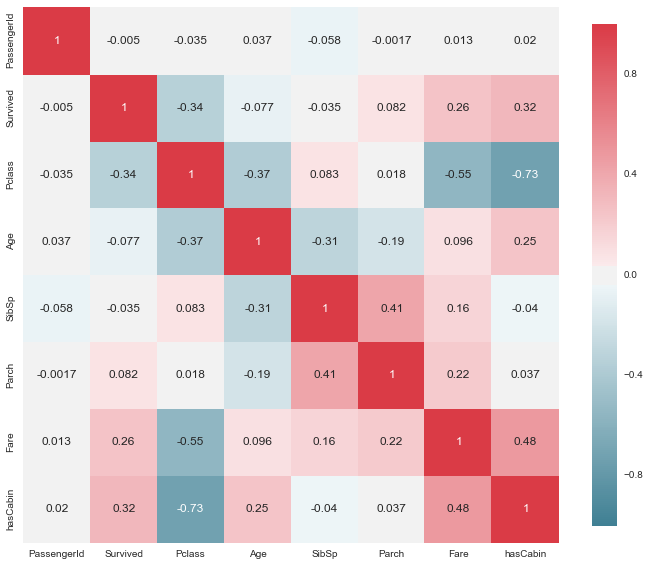

In [18]:
plot_correlation_map( train_df )

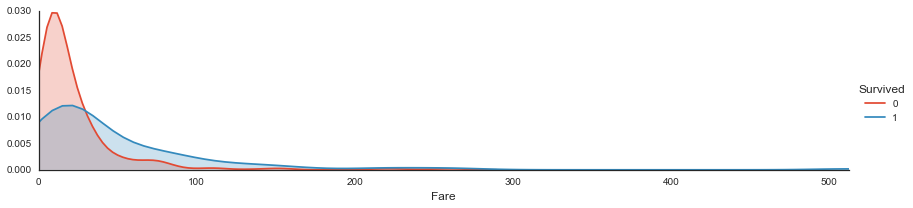

In [19]:
plot_distribution( train_df, var = "Fare", target="Survived")

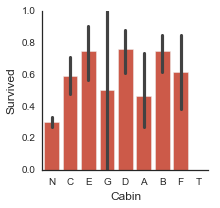

In [20]:
plot_categories( train_df, cat = "Cabin", target="Survived")

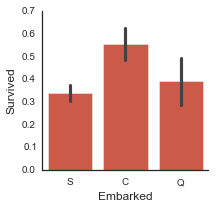

In [21]:
plot_categories( train_df , cat = 'Embarked' , target = 'Survived' )

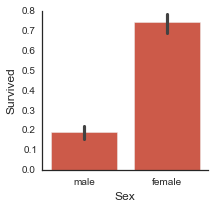

In [22]:
plot_categories( train_df , cat = 'Sex' , target = 'Survived' )

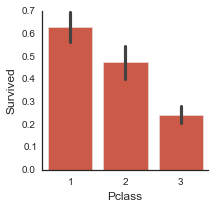

In [23]:
plot_categories( train_df , cat = 'Pclass' , target = 'Survived' )

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,0


In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
train_df.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,0,Mr


In [26]:
train_df[ ["Title", "Survived"] ].groupby(["Title"]).agg( {"Survived": ["count", "mean"] })

Survived          
            count      mean
Title                      
Capt            1  0.000000
Col             2  0.500000
Countess        1  1.000000
Don             1  0.000000
Dr              7  0.428571
Jonkheer        1  0.000000
Lady            1  1.000000
Major           2  0.500000
Master         40  0.575000
Miss          182  0.697802
Mlle            2  1.000000
Mme             1  1.000000
Mr            517  0.156673
Mrs           125  0.792000
Ms              1  1.000000
Rev             6  0.000000
Sir             1  1.000000

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [28]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,0,1


In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,N,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,N,S,0,1


In [31]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [32]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.mean()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = age_guess
 
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,N,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,N,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C,S,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,N,S,0,1


In [33]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).agg( {"Survived": ["mean", "count"] }).sort_values(by=['AgeBand'], ascending=True)

AgeBand  Survived      
                    mean count
0  (-0.08, 16]  0.550000   100
1     (16, 32]  0.337374   495
2     (32, 48]  0.412037   216
3     (48, 64]  0.434783    69
4     (64, 80]  0.090909    11

In [34]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).agg({ "Survived": ["mean", "count"]} )

Embarked  Survived      
                mean count
0        C  0.553571   168
1        Q  0.389610    77
2        S  0.339009   646

In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title,AgeBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,N,0,0,1,"(16, 32]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,1,1,3,"(32, 48]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,N,0,0,2,"(16, 32]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C,0,1,3,"(32, 48]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,N,0,0,1,"(32, 48]",1,1


In [39]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [41]:
for dataset in combine:
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']  = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [42]:
dataset["Cabin"].describe()

count     418
unique      8
top         N
freq      327
Name: Cabin, dtype: object

In [43]:
cabin_map = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "N": 7, "T": 8}
for dataset in combine:
    dataset["Cabin"] = dataset['Cabin'].map( cabin_map ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,Title,AgeBand,FamilySize,IsAlone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,7,0,0,1,"(16, 32]",2,0,"[0, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,1,1,3,"(32, 48]",2,0,"(31, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,7,0,0,2,"(16, 32]",1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,2,0,1,3,"(32, 48]",2,0,"(31, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,7,0,0,1,"(32, 48]",1,1,"(7.91, 14.454]"


In [44]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'SibSp']
train_df = train_df.drop(drop_elements, axis = 1)
train_df = train_df.drop(['AgeBand', 'FareBand'], axis = 1)
test_id = test_df["PassengerId"]
test_df  = test_df.drop(drop_elements, axis = 1)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Cabin         891 non-null int64
Embarked      891 non-null int64
hasCabin      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: int64(12)
memory usage: 83.6 KB


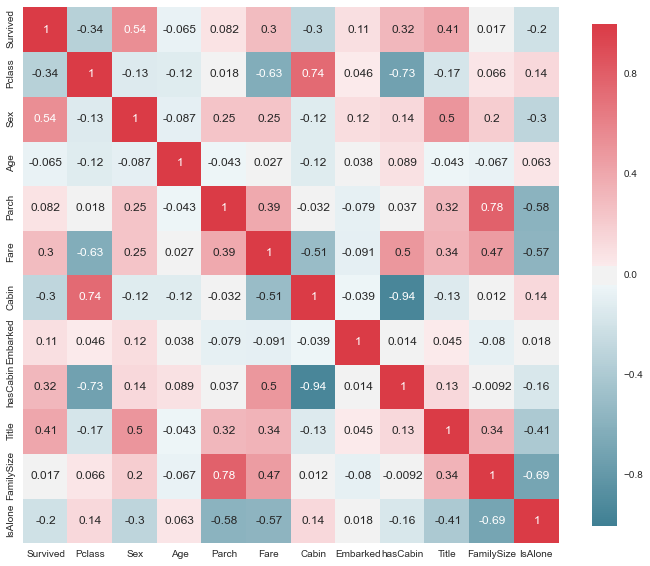

In [46]:
plot_correlation_map( train_df )

# Modeling

## Prepare train, cross-validation dataset

In [47]:
X = train_df.drop(["Survived"], axis = 1)
y = train_df["Survived"]

In [48]:
from sklearn.model_selection import train_test_split
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)

In [49]:
from sklearn.metrics import make_scorer, accuracy_score
acc_scorer = make_scorer(accuracy_score)

## K-Fold validation

In [50]:
from sklearn.cross_validation import KFold
train_size = X.shape[0]
def run_kfold(clf, n_folds = 10):
    kf = KFold(train_size, n_folds)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_y_pred = lg.predict(X_test)
lg_score = accuracy_score(y_test, lg_y_pred)
print("Logistic regression accuracy score: %.3f" % (lg_score))

Logistic regression accuracy score: 0.788


In [52]:
run_kfold(lg, 5)

Fold 1 accuracy: 0.782122905028
Fold 2 accuracy: 0.792134831461
Fold 3 accuracy: 0.808988764045
Fold 4 accuracy: 0.792134831461
Fold 5 accuracy: 0.814606741573
Mean Accuracy: 0.797997614713


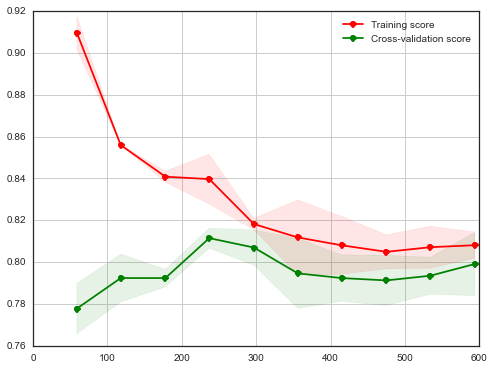

In [53]:
plot_learning_curve(lg, "Logistic Regression", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_search = GridSearchCV(dt, parameters, scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)
dt = grid_search.best_estimator_
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Random forest accuracy score: 0.788


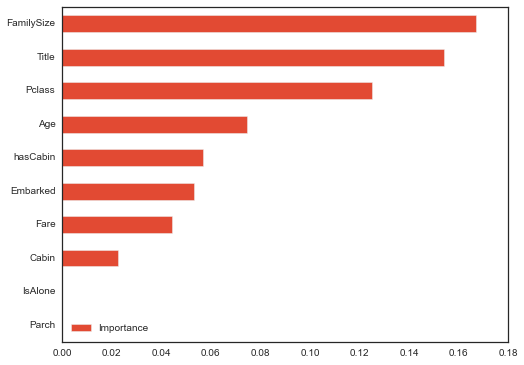

In [55]:
plot_model_var_imp(dt, X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_score = accuracy_score(y_test, dt_y_pred)
print("Random forest accuracy score: %.3f" % (dt_score))

In [56]:
run_kfold(dt, 5)

Fold 1 accuracy: 0.854748603352
Fold 2 accuracy: 0.808988764045
Fold 3 accuracy: 0.758426966292
Fold 4 accuracy: 0.803370786517
Fold 5 accuracy: 0.837078651685
Mean Accuracy: 0.812522754378


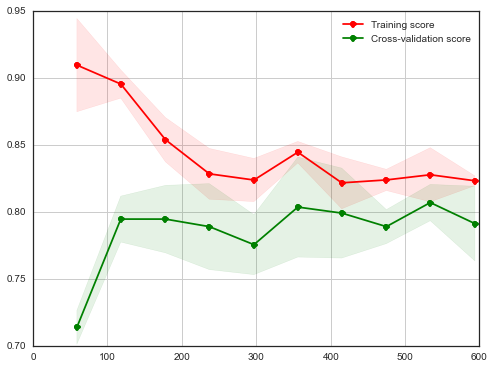

In [57]:
plot_learning_curve(dt, "Decision Tree", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier()

# parameters = {'n_estimators': [4, 6, 9], 
#               'max_depth': [2, 3, 5], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# grid_search = GridSearchCV(rf, parameters, scoring=acc_scorer)
# grid_search = grid_search.fit(X_train, y_train)
rf = RandomForestClassifier()

rf = grid_search.best_estimator_
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Random forest accuracy score: 0.810


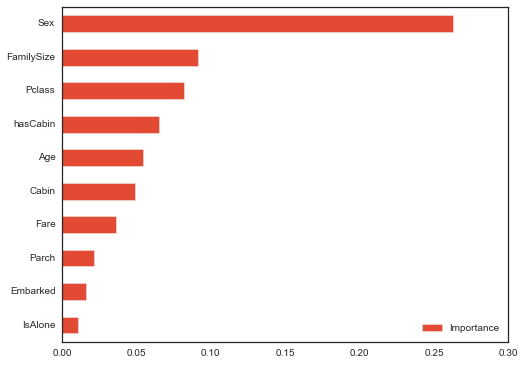

In [74]:
plot_model_var_imp(rf, X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_y_pred)
print("Random forest accuracy score: %.3f" % (rf_score))

In [75]:
run_kfold(rf, 5)

Fold 1 accuracy: 0.810055865922
Fold 2 accuracy: 0.814606741573
Fold 3 accuracy: 0.814606741573
Fold 4 accuracy: 0.792134831461
Fold 5 accuracy: 0.870786516854
Mean Accuracy: 0.820438139476


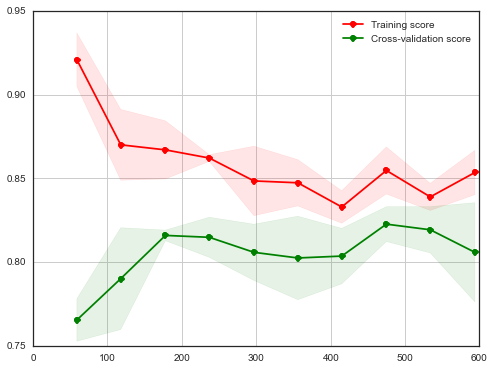

In [76]:
plot_learning_curve(rf, "Random Forest", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## Support Vector Machines

In [67]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}

svc = SVC()
grid_search = GridSearchCV(svc, parameters, scoring = acc_scorer)
grid_search = grid_search.fit(X_train, y_train)
svc = grid_search.best_estimator_
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_y_pred)
print("Support vector machine accuracy score: %.3f" % (svc_score))

Support vector machine accuracy score: 0.804


In [68]:
run_kfold(svc, 5)

Fold 1 accuracy: 0.826815642458
Fold 2 accuracy: 0.820224719101
Fold 3 accuracy: 0.825842696629
Fold 4 accuracy: 0.803370786517
Fold 5 accuracy: 0.870786516854
Mean Accuracy: 0.829408072312


In [69]:
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

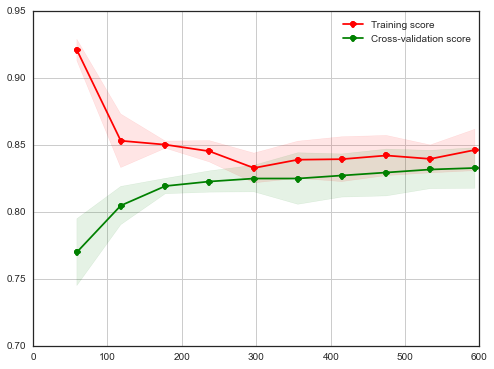

In [70]:
plot_learning_curve(svc, "Support Vector Machine", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# gbc = GradientBoostingClassifier()

# parameters = {'n_estimators': [4, 6, 9], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1,5,8]
#              }

# grid_search = GridSearchCV(gbc, parameters, scoring=acc_scorer)
# grid_search = grid_search.fit(X_train, y_train)
# gbc = grid_search.best_estimator_

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_y_pred)
print("Gradient Boosting accuracy score: %.3f" % (gbc_score))

Gradient Boosting accuracy score: 0.793


In [78]:
run_kfold(gbc, 5)

Fold 1 accuracy: 0.832402234637
Fold 2 accuracy: 0.803370786517
Fold 3 accuracy: 0.808988764045
Fold 4 accuracy: 0.786516853933
Fold 5 accuracy: 0.876404494382
Mean Accuracy: 0.821536626703


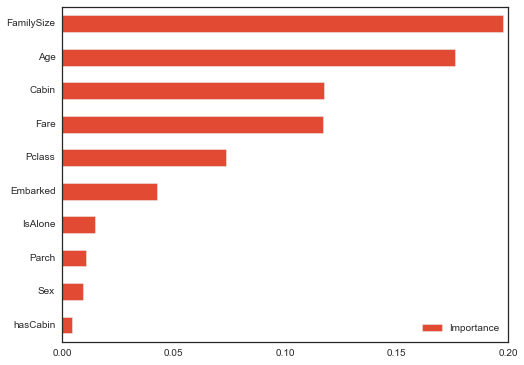

In [79]:
plot_model_var_imp(gbc, X_train, y_train)

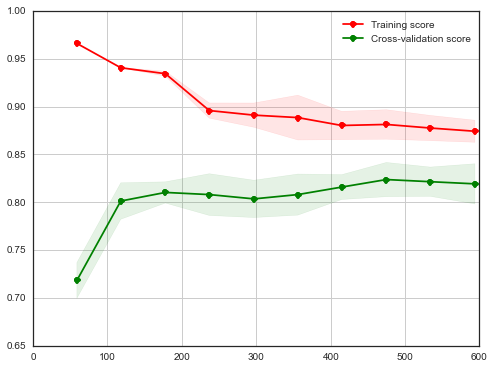

In [80]:
plot_learning_curve(gbc, "Gradient Boosting accuracy", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

In [81]:
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 3, 5, 7, 9] }

grid_search = GridSearchCV(knn, parameters, scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)
knn = grid_search.best_estimator_
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_y_pred)
print("KNN: %.3f" % (knn_score))

KNN: 0.799


In [86]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

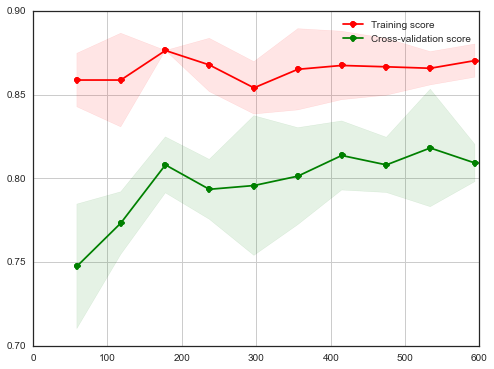

In [87]:
plot_learning_curve(knn, "KNeighborsClassifier", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

In [88]:
run_kfold(knn, 5)

Fold 1 accuracy: 0.709497206704
Fold 2 accuracy: 0.803370786517
Fold 3 accuracy: 0.831460674157
Fold 4 accuracy: 0.831460674157
Fold 5 accuracy: 0.859550561798
Mean Accuracy: 0.807067980667


## Gaussian Navie Bayes 

In [89]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
gnb_score = accuracy_score(y_test, gnb_y_pred)
print("Gaussian Navie Bayes %.3f" % (gnb_score))

Gaussian Navie Bayes 0.777


In [90]:
run_kfold(gnb, 5)

Fold 1 accuracy: 0.720670391061
Fold 2 accuracy: 0.758426966292
Fold 3 accuracy: 0.76404494382
Fold 4 accuracy: 0.769662921348
Fold 5 accuracy: 0.814606741573
Mean Accuracy: 0.765482392819


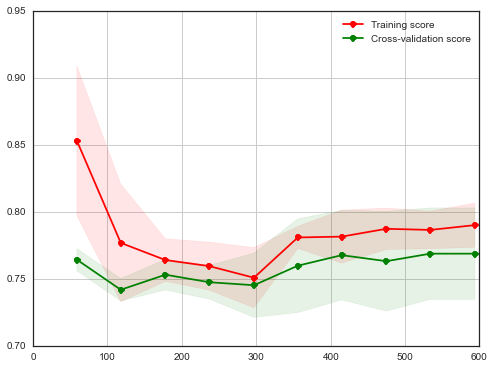

In [91]:
plot_learning_curve(gnb, "Gaussian Navie Bayes", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## AdaBoost

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.1, 0.25, 0.5, 0.75]
}

ada = AdaBoostClassifier()
grid_search = GridSearchCV(ada, parameters, scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)
ada = grid_search.best_estimator_
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_y_pred)
print("AdaBoostClassifier: %.3f" % (ada_score))

AdaBoostClassifier: 0.782


In [100]:
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=None)

In [101]:
run_kfold(ada, 5)

Fold 1 accuracy: 0.832402234637
Fold 2 accuracy: 0.820224719101
Fold 3 accuracy: 0.808988764045
Fold 4 accuracy: 0.797752808989
Fold 5 accuracy: 0.85393258427
Mean Accuracy: 0.822660222208


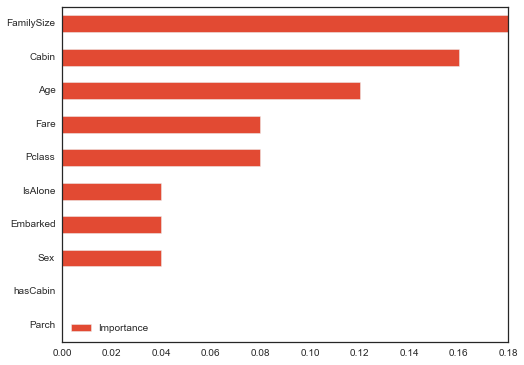

In [102]:
plot_model_var_imp(ada, X_train, y_train)

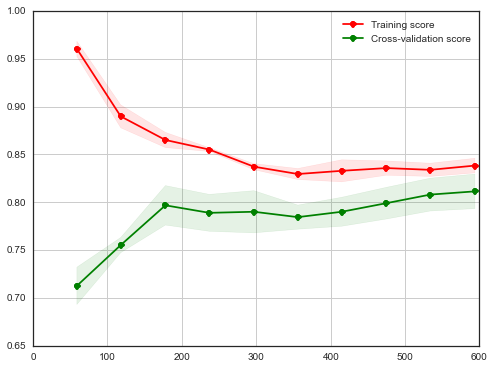

In [98]:
plot_learning_curve(ada, "Ada Boost Classifier", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

## Extra Tree

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [4, 6, 9], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

et = ExtraTreesClassifier()
grid_search = GridSearchCV(et, parameters, scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)
et = grid_search.best_estimator_
et.fit(X_train, y_train)
et_y_pred = et.predict(X_test)
et_score = accuracy_score(y_test, et_y_pred)
print("ExtraTreesClassifier: %.3f" % (et_score))

ExtraTreesClassifier: 0.793


In [104]:
run_kfold(et, 5)

Fold 1 accuracy: 0.854748603352
Fold 2 accuracy: 0.769662921348
Fold 3 accuracy: 0.808988764045
Fold 4 accuracy: 0.792134831461
Fold 5 accuracy: 0.842696629213
Mean Accuracy: 0.813646349884


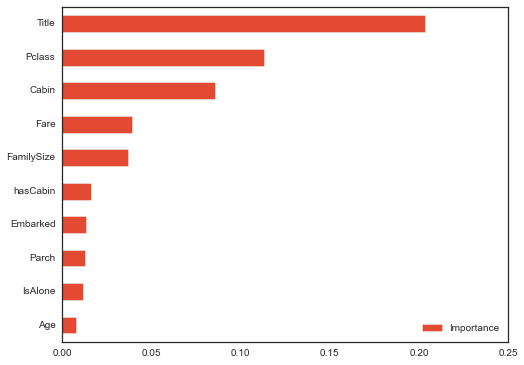

In [105]:
plot_model_var_imp(et, X_train, y_train)

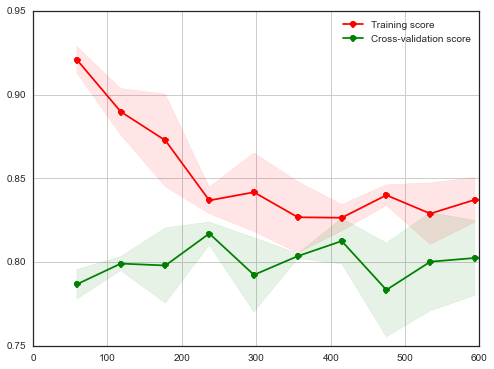

In [106]:
plot_learning_curve(et, "Extra Tree Classifier", X, y, train_sizes = np.linspace(0.1, 1, 10), scoring = acc_scorer)

In [107]:
model = ["logistic regression",
         "decision tree",
         "random forest",
         "gradient boosting tree",
         "support vector machine",
         "navie bayes",
         "etra tree",
         "ada boost",
         "K nearest neighbour"]
score = [lg_score, dt_score, rf_score, gbc_score, svc_score, gnb_score, et_score, ada_score, knn_score]
res = pd.DataFrame({"name": model, "score": score})

In [108]:
res.sort_values([ 'score' ] , ascending = False)

,name,score
2,random forest,0.810056
4,support vector machine,0.804469
8,K nearest neighbour,0.798883
3,gradient boosting tree,0.793296
6,etra tree,0.793296
0,logistic regression,0.787709
1,decision tree,0.787709
7,ada boost,0.782123
5,navie bayes,0.776536


In [109]:
dataset["hasCabin"] = pd.Series(len(dataset["Cabin"]), index=dataset.index)
dataset["hasCabin"] = 0 
dataset.loc[dataset["Cabin"].notnull(), "hasCabin"] = 1

In [110]:
class EnsembleModel:
    def __init__(self, models):
        self.models = models
        self.size = len(models)
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
            
    def predict(self, X):
        preds = map(lambda obj: obj.predict(X), self.models)
        return map(lambda x: x / 5, np.array(preds).sum(axis = 0))

In [119]:
majority_vote = EnsembleModel( [rf, svc, gbc, knn, ada, lg, gnb, dt, et] )
majority_vote.fit(X_train, y_train)

In [120]:
preds = majority_vote.predict(X_test)

In [121]:
run_kfold(majority_vote)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.820224719101
Fold 3 accuracy: 0.775280898876
Fold 4 accuracy: 0.85393258427
Fold 5 accuracy: 0.831460674157
Fold 6 accuracy: 0.831460674157
Fold 7 accuracy: 0.797752808989
Fold 8 accuracy: 0.831460674157
Fold 9 accuracy: 0.887640449438
Fold 10 accuracy: 0.85393258427
Mean Accuracy: 0.828314606742


# Prediction

In [ ]:
test_df.head()

In [ ]:
predictions = svc.predict(test_df)
submit = pd.DataFrame({ 'PassengerId': test_id, 'Survived': predictions })
submit.to_csv("../output/svc.csv", index=False)

In [ ]:
predictions = rf.predict(test_df)
submit = pd.DataFrame({ 'PassengerId': test_id, 'Survived': predictions })
submit.to_csv("../output/rf.csv", index=False)

In [122]:
predictions = majority_vote.predict(test_df)
submit = pd.DataFrame({ 'PassengerId': test_id, 'Survived': predictions })
submit.to_csv("../output/ensemble.csv", index=False)